# [线性回归](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

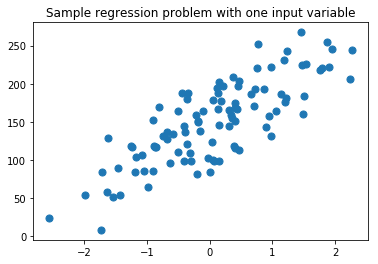

In [3]:
# 人工生成用于测试回归的数据集
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

%matplotlib inline

plt.figure()
plt.title('Sample regression problem with one input variable')

# 每个样本只有一个变量
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()

In [4]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,
                                                   random_state = 0)
# 调用线型回归模型
linreg = LinearRegression()

# 训练模型
linreg.fit(X_train, y_train)

# 输出结果
print('线型模型的系数(w): {}'.format(linreg.coef_))
print('线型模型的常数项(b): {:.3f}'.format(linreg.intercept_))
print('训练集中R-squared得分: {:.3f}'.format(linreg.score(X_train, y_train)))
print('测试集中R-squared得分: {:.3f}'.format(linreg.score(X_test, y_test)))

线型模型的系数(w): [45.70870465]
线型模型的常数项(b): 148.446
训练集中R-squared得分: 0.679
测试集中R-squared得分: 0.492


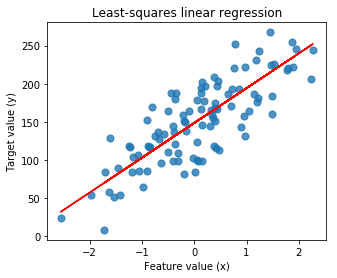

In [5]:
# 可视化输出结果

plt.figure(figsize=(5,4))
plt.scatter(X_R1, y_R1, marker= 'o', s=50, alpha=0.8)
plt.plot(X_R1, linreg.coef_ * X_R1 + linreg.intercept_, 'r-')
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

## 3. [逻辑回归](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

C=0.1，准确率：0.667


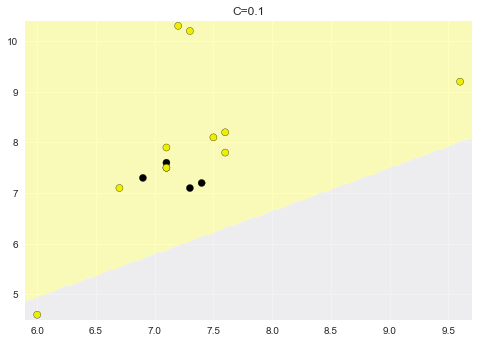

C=1，准确率：0.600


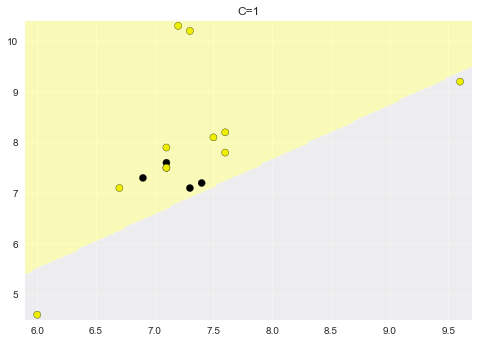

C=100，准确率：0.733


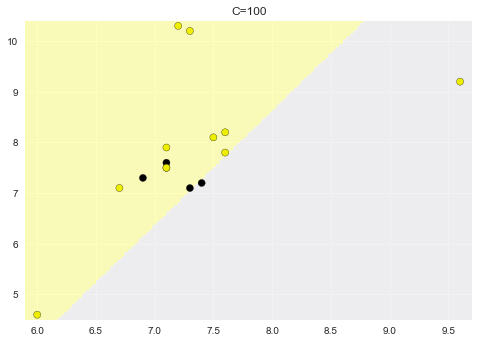

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from ml_visualization import plot_class_regions_for_classifier

# 加载数据集
fruits_df = pd.read_table('fruit_data_with_colors.txt')

X = fruits_df[['width', 'height']]
y = fruits_df['fruit_label'].copy()

# 将不是apple的标签设为0
y[y != 1] = 0
# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4, random_state=0)

# 不同的C值
c_values = [0.1, 1, 100]

for c_value in c_values:
    # 建立模型
    lr_model = LogisticRegression(C=c_value)

    # 训练模型
    lr_model.fit(X_train, y_train)

    # 验证模型
    y_pred = lr_model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print('C={}，准确率：{:.3f}'.format(c_value, acc))
    
    # 可视化
    plot_class_regions_for_classifier(lr_model, X_test.values, y_test.values, title='C={}'.format(c_value))